## Import Libraries

In [75]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

## Code

In [76]:
def hough_line_transform(image_path, edge_threshold1 = 400, edge_threshold2 = 500, rho_resolution = 2, theta_resolution = 2, threshold = 120):

    # Load and preprocess the image
    img = cv2.imread(image_path)
    if img is None:
        raise FileNotFoundError(f"Image not found at {image_path}")
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Edge detection
    edges = cv2.Canny(gray, edge_threshold1, edge_threshold2)
    print(f"Number of edge points: {np.sum(edges > 0)}")
    
    # Hough Transform setup
    height, width = edges.shape
    max_rho = int(np.sqrt(height**2 + width**2))  # Max rho based on diagonal
    thetas = np.deg2rad(np.arange(-90, 90, theta_resolution))
    rhos = np.arange(-max_rho, max_rho, rho_resolution)
    accumulator = np.zeros((len(rhos), len(thetas)), dtype=np.uint32)
    
    # Get edge point coordinates
    y_idxs, x_idxs = np.nonzero(edges)
    edge_points = np.vstack((x_idxs, y_idxs)).T  # Shape: (n_points, 2)
    
    # Vectorized rho computation
    cos_theta = np.cos(thetas)
    sin_theta = np.sin(thetas)
    rho_values = edge_points @ np.vstack((cos_theta, sin_theta))  # Shape: (n_points, n_thetas)
    
    # Map rho values to bins
    rho_indices = np.floor((rho_values - rhos[0]) / rho_resolution).astype(int)
    
    # Accumulate votes
    for i in range(rho_indices.shape[0]):
        for j in range(rho_indices.shape[1]):
            rho_idx = rho_indices[i, j]
            if 0 <= rho_idx < len(rhos):
                accumulator[rho_idx, j] += 1
    
    print(f"Accumulator shape: {accumulator.shape}")
    
    # Detect lines
    lines = []
    for rho_idx in range(accumulator.shape[0]):
        for theta_idx in range(accumulator.shape[1]):
            if accumulator[rho_idx, theta_idx] > threshold:
                rho = rhos[rho_idx]
                theta = thetas[theta_idx]
                lines.append((rho, theta))
    
    print(f"Number of lines detected: {len(lines)}")
    
    # Draw lines
    output_img = img.copy()
    for rho, theta in lines:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        length = int(np.sqrt(height**2 + width**2))
        pt1 = (int(x0 + length * (-b)), int(y0 + length * a))
        pt2 = (int(x0 - length * (-b)), int(y0 - length * a))
        cv2.line(output_img, pt1, pt2, (0, 0, 255), 2)  # Red lines
    
    return edges, accumulator, output_img

def hough_transform(image_path, edge_threshold1 = 400, edge_threshold2 = 500, rho_resolution = 2, theta_resolution = 2, threshold = 120):
   
    try:
        edges, accumulator, result = hough_line_transform(
            image_path,
            edge_threshold1,
            edge_threshold2,
            rho_resolution,
            theta_resolution,
            threshold
        )
        
        # Optional visualization (comment out for speed)
        plt.figure(figsize=(15, 10))
        plt.subplot(131)
        plt.imshow(edges, cmap='gray')
        plt.title('Edge Map')
        
        plt.subplot(132)
        plt.imshow(accumulator, cmap='hot', aspect=accumulator.shape[1] / accumulator.shape[0])
        plt.title('Accumulator Space')
        
        plt.subplot(133)
        plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
        plt.title('Detected Lines')
        
        plt.tight_layout()
        plt.show()
    
    except Exception as e:
        print(f"An error occurred: {e}")


## Function call of program-1

Number of edge points: 659
Accumulator shape: (381, 90)
Number of lines detected: 5


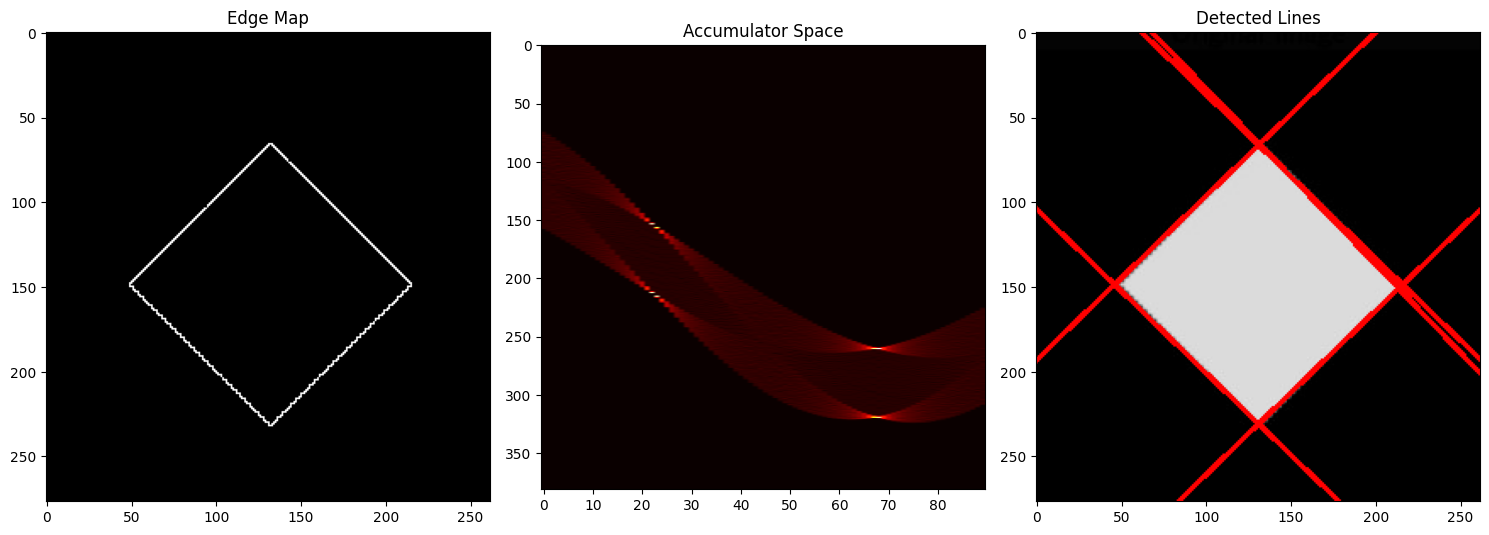

Number of edge points: 12141
Accumulator shape: (646, 90)
Number of lines detected: 87


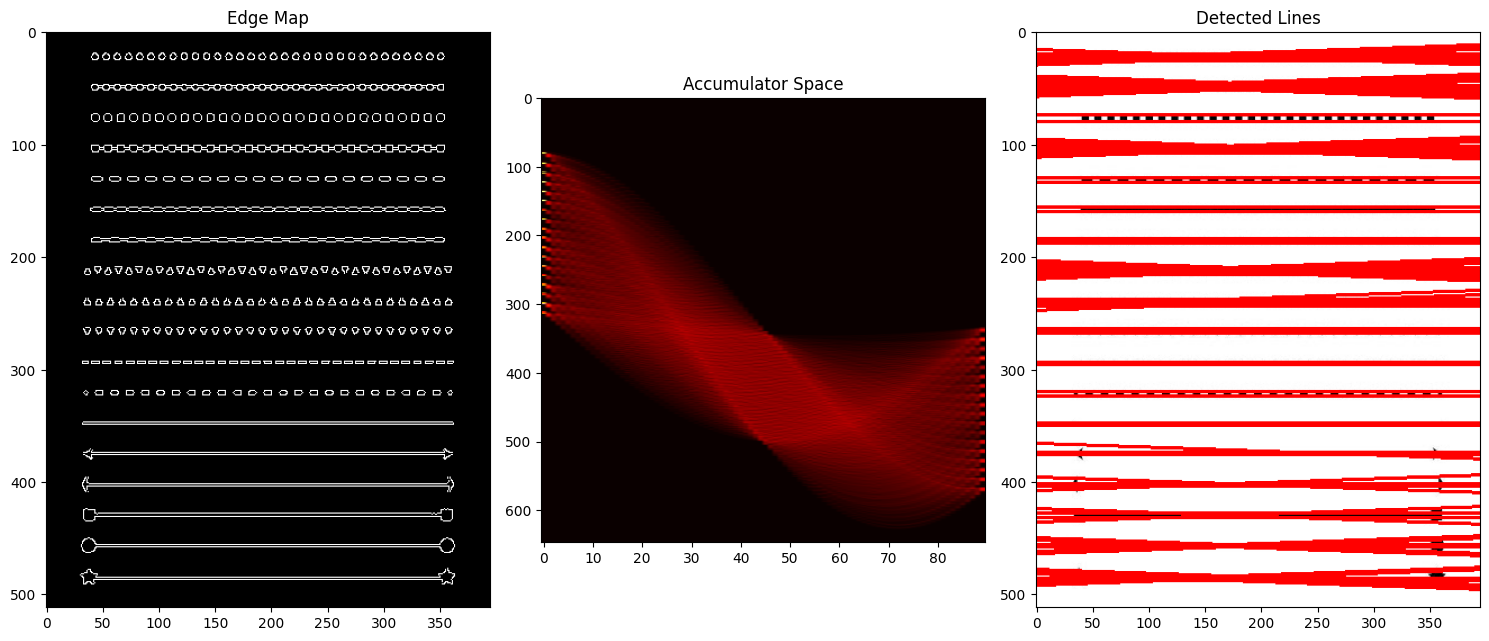

Number of edge points: 695
Accumulator shape: (330, 90)
Number of lines detected: 2


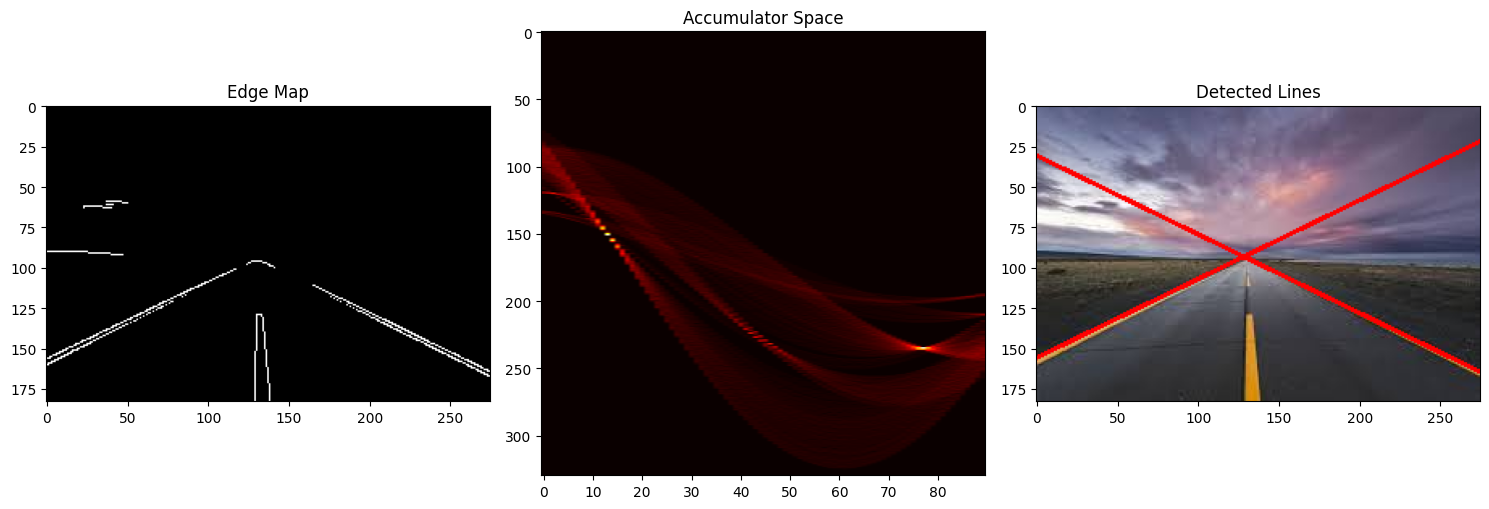

Number of edge points: 4888
Accumulator shape: (442, 90)
Number of lines detected: 23


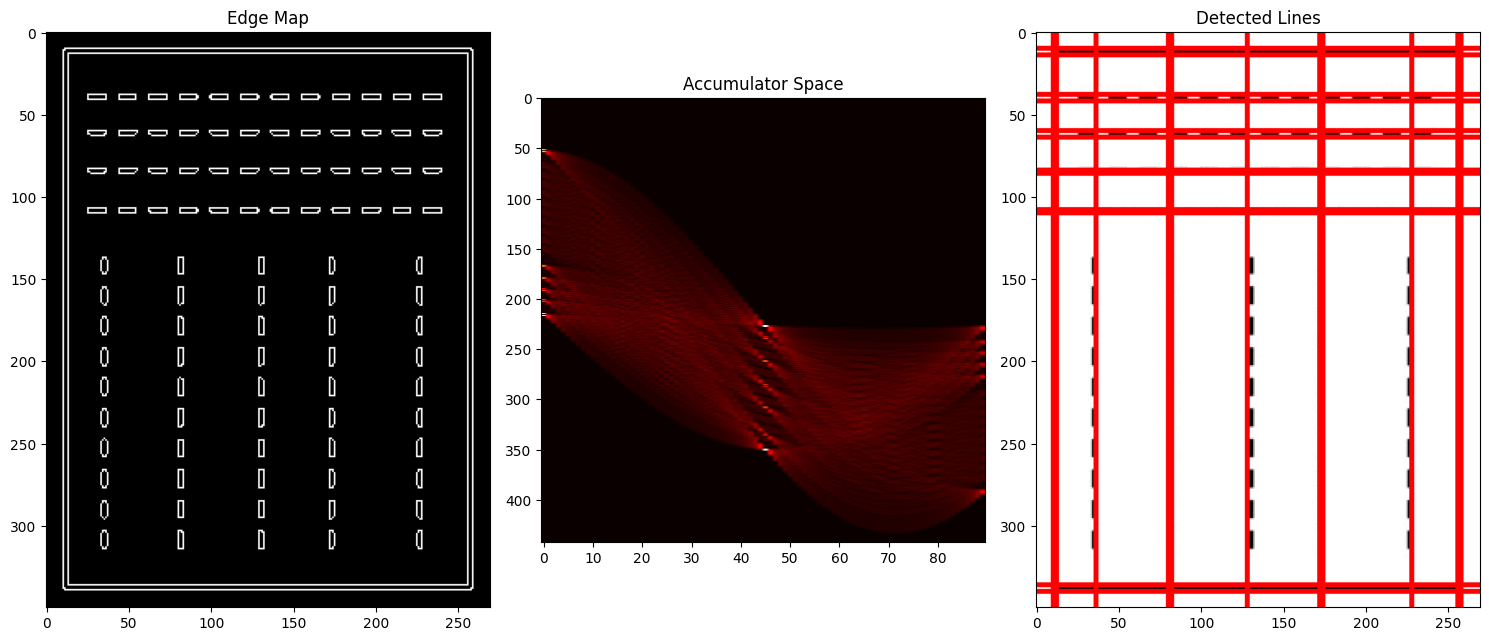

In [ ]:
for i in range(1, 5):
    hough_transform(f"images\\pic-0{i}.jpg",
                    edge_threshold1 = 400,
                    edge_threshold2 = 500,
                    rho_resolution = 2,
                    theta_resolution = 2,
                    threshold = 122
                    )